<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_NLPandText-Analytics/blob/main/SpamorHam_DeepLerning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics"

/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics


In [ ]:
import numpy as np
import pandas as pd
import string
import re
import nltk
from textblob import Word 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Version:  2.8.2
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [ ]:
spamham_file = '/content/gdrive/My Drive/Colab Notebooks/Reva/5_NLP_TextAnalytics/spam.csv'

In [ ]:
import chardet
with open(spamham_file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7270322499829184, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
df = pd.read_csv(spamham_file,encoding='ISO-8859-1')
df.head(10)
df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
lingspam = df[['v1','v2']]
lingspam.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:

lingspam.rename(columns = {'v1':'Class', 'v2':'Body'}, inplace = True)
lingspam.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Class,Body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [ ]:
# 86% of emails are ham and 13% spam
lingspam['Class'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

#<font color='brown'><b>Data Pre-Procesing</b></font>

### <font color='blue'><b>Preliminary Analysis</b></font>

In [ ]:
lingspam.shape

(5572, 2)

In [ ]:
lingspam.isnull().sum()

Class    0
Body     0
dtype: int64

### <font color="blue">**Remove Stopwords and Delimeter**</font>

In [ ]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


lingspam['Body'].apply(text_process)
lingspam.head(5)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5568                   [Ì, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: Body, Length: 5572, dtype: object

,Class,Body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### <font color="blue">**Lemmatization**</font><br/>In simpler terms, it is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. For example, lemmatization would correctly identify the base form of ‘caring’ to ‘care’, whereas, stemming would cutoff the ‘ing’ part and convert it to car. Lemmatization can be implemented in python by using Wordnet Lemmatizer, Spacy Lemmatizer, TextBlob, Stanford CoreNLP

In [ ]:
lemmatizer = WordNetLemmatizer()

print('With out Lammetization - ', lingspam['Body'][2])

Lemmatized = lingspam['Body'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
print('With Lemmatization -     ',  Lemmatized[2])

With out Lammetization -  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
With Lemmatization -      Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


### <font color="blue"> 1.Remove links from the dataset. <br> 2.Remove special characters or symbols from the dataset. <br> 3. Remove numbers or alphanumerical characters from the dataset.</font>

In [ ]:
lingspam['Body'] = lingspam['Body'].str.replace(r'([\w\.-]+)@([\w\.-]+)',' ') #remove email addresses
lingspam['Body'] = lingspam['Body'].str.replace(r'[^\w\s]',' ') #remove punctuations and special chareters from dataset
lingspam['Body'] = lingspam['Body'].str.replace(r'(https|http)?:\/\/(\w|\.|\_|\/|\?|\=|\&|\%)*\b', ' ') # Remove links from the dataset.
lingspam['Body'] = lingspam['Body'].str.replace(r'[^\w]', ' ') #Remove not alphanumeric symbols white spaces

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
d = {'ham': 0, 'spam': 1}
lingspam['Class'] = lingspam['Class'].map(d)
lingspam.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Class,Body
0,0,Go until jurong point crazy Available only ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don t think he goes to usf he lives aro...


#<font color='brown'><b>Model creation and prediction</b></font><br><br>
## <font color="blue">Train-Test Split and perform the classification task using the Naive Bayes classification model. <br> </font>

In [ ]:
x = lingspam['Body']
y = lingspam['Class']

len(x), len(y)

(5572, 5572)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

4179 4179
1393 1393


In [ ]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = x_train[:2000]
partial_x_train = x_train[2000:]

y_val = y_train[:2000]
partial_y_train = y_train[2000:]

x_val.size
print()
partial_x_train.size
print()
y_val.size
print()
partial_y_train.size

2000

2179

2000

2179

In [ ]:
type(partial_x_train)

pandas.core.series.Series

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=300,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
8/8 [==============================] - 7s 725ms/step - loss: 0.5351 - accuracy: 0.8720 - val_loss: 0.4977 - val_accuracy: 0.8605
Epoch 2/20
8/8 [==============================] - 5s 678ms/step - loss: 0.4584 - accuracy: 0.8710 - val_loss: 0.4315 - val_accuracy: 0.8600
Epoch 3/20
8/8 [==============================] - 5s 677ms/step - loss: 0.3872 - accuracy: 0.8710 - val_loss: 0.3722 - val_accuracy: 0.8600
Epoch 4/20
8/8 [==============================] - 6s 713ms/step - loss: 0.3238 - accuracy: 0.8720 - val_loss: 0.3234 - val_accuracy: 0.8600
Epoch 5/20
8/8 [==============================] - 5s 683ms/step - loss: 0.2723 - accuracy: 0.8752 - val_loss: 0.2853 - val_accuracy: 0.8625
Epoch 6/20
8/8 [==============================] - 5s 658ms/step - loss: 0.2319 - accuracy: 0.8825 - val_loss: 0.2563 - val_accuracy: 0.8685
Epoch 7/20
8/8 [==============================] - 5s 681ms/step - loss: 0.2010 - accuracy: 0.8954 - val_loss: 0.2336 - val_accuracy: 0.8815
Epoch 8/20
8/8 [====

In [ ]:
results = model.evaluate(x_test, y_test)

print(results)

44/44 [==============================] - 3s 62ms/step - loss: 0.1293 - accuracy: 0.9756
[0.1292867511510849, 0.9755922555923462]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

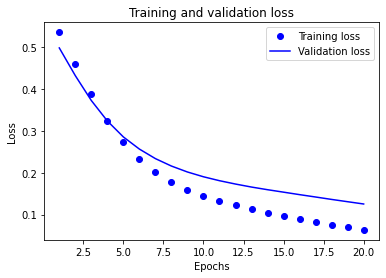

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

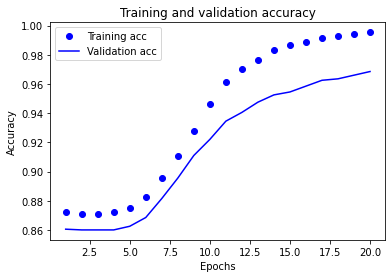

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()